# Probability maps
APOC is based on [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) and [sklearn](https://scikit-learn.org/stable/).

Let's start with loading an example image and some ground truth:

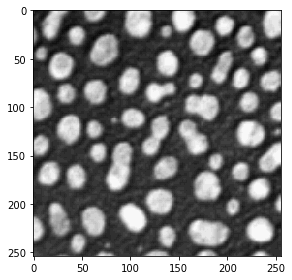

In [1]:
from skimage.io import imread, imshow, imsave
import matplotlib.pyplot as plt
import numpy as np
import apoc

image = imread('blobs.tif')
imshow(image)

In [2]:
do_manual_annotation = False

if do_manual_annotation: # you can use this to make manual annotations
    import napari

    # start napari
    viewer = napari.Viewer()
    napari.run()

    # add image
    viewer.add_image(image)

    # add an empty labels layer and keep it in a variable
    labels = np.zeros(image.shape).astype(int)
    viewer.add_labels(labels)
    
else:
    labels = imread('annotations_3class.tif')

C:\Users\rober\miniconda3\envs\bio_38\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


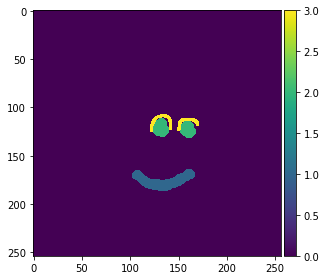

In [3]:
manual_annotations = labels
if do_manual_annotation:
    imsave('annotations_3class.tif', manual_annotations)

from skimage.io import imshow
imshow(manual_annotations, vmin=0, vmax=3)

## Training
We now train a PixelClassifier, which is under the hood a [scikit-learn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). After training, the classifier will be converted to [clij-compatible OpenCL code](https://github.com/clEsperanto/clij-opencl-kernels) and save to disk under a given filename.

In [4]:
# define features: original image, a blurred version and an edge image
features = "original gaussian_blur=2 sobel_of_gaussian_blur=2"

# this is where the model will be saved
cl_filename = 'my_model.cl'

output_probability_of_class = 3

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

## Prediction
The classifier can then be used to classify all pixels in the given image. Starting point is again, the feature stack. Thus, the user must make sure that the same features are used for training and for prediction. 

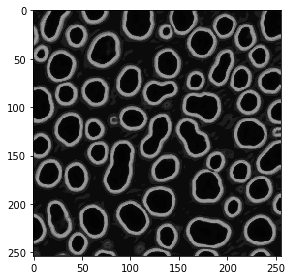

In [5]:
result = clf.predict(image=image)
imshow(result)

## Training / prediction for other classes
We will now train again and output the probability of another class

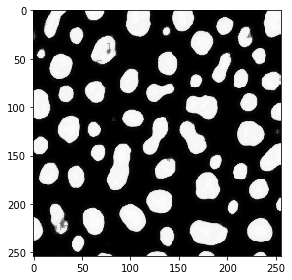

In [6]:
output_probability_of_class = 2

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

result = clf.predict(image=image)
imshow(result)

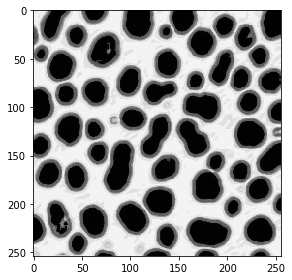

In [7]:
output_probability_of_class = 1

apoc.erase_classifier(cl_filename)
clf = apoc.ProbabilityMapper(opencl_filename=cl_filename, output_probability_of_class=output_probability_of_class)
clf.train(features, manual_annotations, image)

result = clf.predict(image=image)
imshow(result)